# **CS2302 Data Structures**
**Assignment:** Lab 1 - Image processing using arrays

**Authors:** Jose G. Perez, Dr. Olac Fuentes

**Last modified:** January 28, 2023


**VERY IMPORTANT! PLEASE READ THIS!**
> For this lab, code will be provided to read 1 sample image for each problem. You **MUST** add at least 2 of your own images for each problem as well. Therefore, for each problem your output should be at least 3 images (1 sample + 2 of your own). Failure to fulfill this requirement will result in a heavy penalty for not reading the lab carefully.

# Student Information
Before proceeding any further, make sure to create a copy of this notebook and change the information below to match yours.

**Make your own copy of the notebook before working on it!** 
> (File > Save a Copy in Drive)


**Name:** Jose Perez (TA)

**Student ID:** 80######

# Submission and Grading Guidelines
**PLEASE READ THIS CAREFULLY!**

* As stated in the syllabus your lab consists of two parts, the source code and the report.
* This Colab notebook contains all the starter code needed for the lab along with some explanations and hints.
* You will submit **both your code and report in this single Colab notebook**, therefore you must extend and modify this notebook to include everything required in the report guidelines in the syllabus.
* Compute the Big-O running times of all your implemented functions and include them in your report.
* Some functions are automatically timed and have their real duration in seconds printed to the console. For such functions be sure to include those times in your report as well.
* Use plots and/or tables to illustrate your results when appropriate.

**DO NOT CHANGE ANY OF THE FUNCTION NAMES OR PARAMETERS**
* As the code might be auto-graded by another program, changing any of the function names or parameters will result in you getting 0 points for that problem. Therefore do not change any function names or parameters.
* Feel free to add more functions, test cases, and any other code as long as you do not modify the pre-existing function names and signatures.

# Code Preparation and Provided Functions
Run the following cell to import all the required libraries and to activate the file upload widget. Upload all the image files that are attached on Blackboard to the Colab notebook using the widget. You can also use this widget to upload your own images, just re-run this cell and upload the new files.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pt
from timeit import default_timer as timer
from pathlib import Path
from PIL import Image

# Allow numpy lines to be of any width so they don't wrap
np.set_printoptions(linewidth=np.inf)

# Check if we are running Google Colab, if so, activate the file upload widget.
try:
  from google.colab import files

  uploaded_files = files.upload()
  using_colab = True
except ImportError:
  using_colab = False

ModuleNotFoundError: No module named 'matplotlib'

The code cell below contains all the provided starter functions. DO NOT CHANGE ANY CODE IN THIS CELL!

In [2]:
# ******************** PROVIDED FUNCTIONS (DON'T CHANGE THIS!) ********************
def read_image_from_file(filename, size=None):
    '''Read an image from a given filename'''
    # Check that the file actually exists
    assert Path(filename).exists(), f'{filename} does not exist'

    # Read the raw image using the imaging library
    raw_image = Image.open(filename)

    if size:
      raw_image = raw_image.resize(size, Image.BILINEAR)

    # Convert that image into an array with values from 0 to 255
    im_array = np.asarray(raw_image, dtype=np.uint8)

    if len(im_array.shape) >= 3:
      im_array = im_array[:, :, :3]
    return im_array

def resize_image(im, size):
  I = Image.fromarray(im)
  I = I.resize(size, Image.BILINEAR)
  return np.asarray(I, dtype=np.uint8)

def plot_image(im, title='', filename=None, size=(4, 4)):
    '''Plot a single image to the screen'''
    return plot_image_grid([im], 1, 1, title, titles=[], filename=filename, size=size)

def plot_image_with_rectangle(im, rect_row, rect_col, rw, rh, title='', filename=None, size=(5, 5)):
    '''Plots a single image to the screen with a rectangle embedded in it'''
    fig, ax = plt.subplots(figsize=size)
    ax.set_title(title)

    for axi in fig.get_axes():
        # Remove plot ticks
        axi.set_yticks([])
        axi.set_xticks([])
        # Remove outline around plot
        axi.spines['top'].set_visible(False)
        axi.spines['right'].set_visible(False)
        axi.spines['left'].set_visible(False)
        axi.spines['bottom'].set_visible(False)

    # Check if the image is grayscale to display the colors correctly
    if len(im.shape) == 2:
        ax.imshow(im, cmap='gray')
    else:
        ax.imshow(im)
    
    # Add rectangle
    ax.add_patch(pt.Rectangle((rect_row, rect_col), rh, rw, fill=False, edgecolor='red', lw=1))
    
    plt.tight_layout()
    plt.show()

    if filename is not None:
        output_dir = Path('./figures')
        if not output_dir.exists():
            output_dir.mkdir()
        plt.savefig(output_dir / filename)

def plot_image_grid(images, nrows, ncols, figure_title, titles=[], filename=None, size=(5, 5)):
    '''Plot multiple images in a grid'''
    fig, ax = plt.subplots(nrows, ncols, figsize=size)

    if len(titles) > 0:
      fig.suptitle(f'{figure_title}', fontsize='medium', weight='bold')
    else:
      titles = [figure_title]

    for axi in fig.get_axes():
        # Remove plot ticks
        axi.set_yticks([])
        axi.set_xticks([])
        # Remove outline around plot
        axi.spines['top'].set_visible(False)
        axi.spines['right'].set_visible(False)
        axi.spines['left'].set_visible(False)
        axi.spines['bottom'].set_visible(False)

    for idx, im in enumerate(images):
        r = idx % nrows
        c = idx // nrows

        if len(images) == 1:
            axi = ax
        elif nrows == 1 or ncols == 1:
            axi = ax[idx]
        else:
            axi = ax[r, c]

        axi.set_title(titles[idx])

        # Check if the image is grayscale to display the colors correctly
        if len(im.shape) == 2:
            axi.imshow(im, cmap='gray')
        else:
            axi.imshow(im)

    plt.tight_layout()
    plt.show()

    if filename is not None:
        output_dir = Path('./figures')
        if not output_dir.exists():
            output_dir.mkdir()
        plt.savefig(output_dir / filename)

    return fig, ax

# Lab Overview
One important real-life application of arrays is in the area of computer vision, where we use arrays to represent images and design algorithms that perform operations on these images by modifying their corresponding arrays.

Specifically, in computer vision a grayscale image with $m$ rows and $n$ columns is usually represented by an $m$ by $n$ array of integers $I$, where $I[r,c]$ is the intensity of the pixel in row $r$ and columns $c$.  Normally, we use 0 to signal a black pixel and 255 to signal a white one.

The figure below shows a grayscale image and the corresponding array representation.

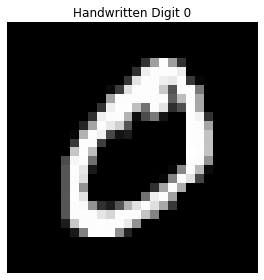

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 18

In [ ]:
# Read the image file as an array
I = read_image_from_file('digit.png')

# Display the image
plot_image(I, 'Handwritten Digit 0')

# Display the array representation of the image
print(I)

# Display some information about the image array
print('Array has a shape of', I.shape, 'so it has', I.shape[0], 'rows and', I.shape[1], 'columns')

Similarly, a color image is represented by an $m$ by $n$ by 3 array of integers $I$, where $I[:,:,0], I[:,:,1]$, and $I[:,:,2]$ represent the red, green, and blue channels in the image, respectively. 

In this lab you will be performing some basic image manipulation tasks using what you have learned about arrays and slicing.

# Part I: Image Manipulation with Arrays
For this part of the lab, you will need to solve the following problems using arrays. 

* Hint: Most of these problems can be solved by slicing the image array correctly with very few of them requiring any extra steps.


## Example: Read a color image from a file and display it on your screen (solution provided)

In [3]:
# Read a color image from a file
I = read_image_from_file('sports.jpg')

# Display it on screen
plot_image(I, 'Kids playing sports', size=(8, 8))

# Print some array information
print('Array has shape', I.shape)

NameError: name 'Path' is not defined

##Problem 1 - Display the red, green, and blue channels of the color image
Recall that a color image is represented by an array of integers $I$, where $I[:,:,0], I[:,:,1]$, and $I[:,:,2]$ represent the red, green, and blue channels in the image, respectively. 

As a hint, the three resulting images will all look gray as they represent the intensities of their respective color. If there is a lot of red in a certain part of the image, the red channel will have values closer to 255 (white) so the red channel image will have brighter pixels in that area.

In [4]:
def get_color_channels(im):
    '''Extract the red, green, and blue channels of the color image separately'''
    im_red = im
    im_green = im
    im_blue = im
    return im_red, im_green, im_blue

# Test the function
I = read_image_from_file('sports.jpg')
im_red, im_green, im_blue = get_color_channels(I)
plot_image_grid([im_red, im_green, im_blue], 1, 3, '', ['Red Channel', 'Green Channel', 'Blue Channel'], size=(20, 5));

NameError: name 'Path' is not defined

## Problem 2 - Display a subsampled version of the image that only includes the even rows and odd columns
As a hint, the resolution of the image will decrease so it will appear blurrier.

In [5]:
def subsampled(im):
    return im

# Test the function
I = read_image_from_file('sports.jpg')
plot_image(subsampled(I), 'Subsampled Image', size=(20, 5));

NameError: name 'Path' is not defined

## Problem 3 - Convert a color image to grayscale by taking its red, green, and blue channels and combining them with this formula: $Grayscale = 0.299R + 0.587G + 0.114B$

In [6]:
def grayscale(im):
    return im

# Test the function
I = read_image_from_file('sports.jpg')
plot_image(grayscale(I), 'Grayscale Image', size=(20, 5));

NameError: name 'Path' is not defined

## Problem 4 - Display the negative of the grayscale version of the image. 
The formula is $Negative\_Grayscale = 255 - Grayscale$

In [7]:
def negative_grayscale(im):
    im_gray = grayscale(im)
    return im_gray

# Test the function
I = read_image_from_file('sports.jpg')
plot_image(negative_grayscale(I), 'Negative Grayscale Image', size=(20, 5));

NameError: name 'Path' is not defined

## Problem 5 - Display a color image upside down
Think about the 2D array and how it would need to be changed to be "upside down".

In [8]:
def upside_down(im):
    return im

# Test the function
I = read_image_from_file('sports.jpg')
plot_image(upside_down(I), 'Upside Down Image', size=(20, 5));

NameError: name 'Path' is not defined

## Problem 6 - Display a color image mirrored (left-right)

In [9]:
def mirrored(im):
    return im

# Test the function
I = read_image_from_file('sports.jpg')
plot_image(mirrored(I), 'Mirrored Image', size=(20, 5));

NameError: name 'Path' is not defined

## Problem 7 - Display a cropped part of the image given the top-left coordinate as well as the width and height of the crop
Remember that the width corresponds to the columns and the height corresponds to the rows.

The provided test case code crops the soccer ball from the children sports image so be sure your output matches that.

In [10]:
def crop(im, top_left_row, top_left_col, crop_w, crop_h):
    '''Crop a part of the image given the top-left coordinates of the crop (top_left_row, top_left_col) 
        as well as the height and width of the crop (crop_h, crop_w)'''
    return im[:, :]

# Test the function
I = read_image_from_file('sports.jpg')
im_crop = crop(I, 470, 400, 80, 80)
plot_image(im_crop, 'Cropped Image', size=(20, 5));

# Provide the expected output for this function
print('Expected Output')
plot_image(read_image_from_file('crop_output.png'), '', size=(20, 5));

NameError: name 'Path' is not defined

## Problem 8 - Interlacing
One approach to combine two or more images into a single one is by interlacing them together. That is, taking one row/column from one image, then one row/column from the other, repeating this until all rows/columns are used, and then resizing the output back to the original image size.

For example, let's say we have two images of the same size $R\ x\ C$ called $im1$ and $im2$ and we want to interlace them column-wise. If we create an image to store our result called $A$ that has $C * 2$ columns and insert the columns of $im1$ and $im2$ in alternating order the result is then

In [11]:
R = 960 # Height/Rows of the images in (pixels)
C = 720 # Width/Columns of the images (in pixels)

# Read both images and resize them to R x C
im1 = read_image_from_file('obama.jpg', size=(C, R))
im2 = read_image_from_file('flag.png', size=(C, R))

# Create an array to store our combined image
# NOTE: dtype=np.uint8 is required for images as they value from 0 to 255
A = np.zeros((R, C*2, 3), dtype=np.uint8)
A[:, ::2] = im1
A[:, 1::2] = im2

# Plot our combined image
plot_image(A, size=(10, 10));

NameError: name 'Path' is not defined

It is also possible to interlace the rows intead of the columns, yielding the following result

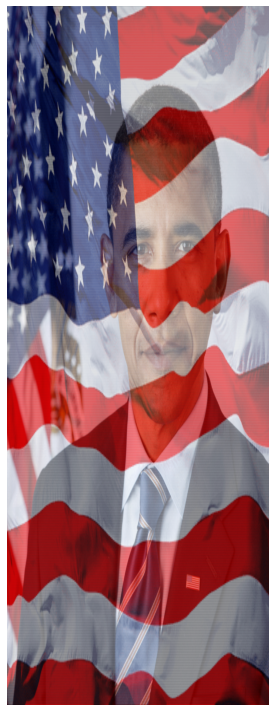

In [ ]:
A = np.zeros((R*2, C, 3), dtype=np.uint8)
A[::2, :] = im1
A[1::2, :] = im2

plot_image(A, size=(10, 10));

This results in an image that is stretched horizontally or vertically depending on whether you interlace rows or columns. We can mitigate this issue by resizing the images back to their original sizes.

In [12]:
# Resize it back to the original size
A = resize_image(A, size=(C, R))

# Plot our combined image
plot_image(A, size=(10, 10));

NameError: name 'A' is not defined

This idea can be extended from two images to any number of images with some simple changes. In the case when 3 images are interlaced we simply skip 3 columns instead of 2 by simply **changing the slice parameters**, and we can keep repeating this for any number of images. Your task is then to:

### Write the function **interlacing(L)** that takes as input a list $L$ of color images represented as arrays and combines them all into one output image through column interlacing as described above.
* If the list is empty your function should **return None**
* If the list has one image your function should **return that image**
* All images in L should be the same size so make sure you load them like in the test case below
* The starter function already contains the resizing code so you only need to focus on doing the column interlacing
* Make sure to test this function with the provided images and with **YOUR OWN IMAGES**

In [13]:
def interlacing(L):
  # All images have the same rows/columns so get them from the shape of the first image (Code provided to student)
  nrows, ncols, ncolors = L[0].shape

  # Resize result back to the original size (Code provided to student)
  A = resize_image(A, size=(ncols, nrows))
  return A

#%% Test the function
R = 960 # Height/Rows of the images in (pixels)
C = 720 # Width/Columns of the images (in pixels)

# Read all images and resize them to R x C
im1 = read_image_from_file('obama.jpg', size=(C, R))
im2 = read_image_from_file('flag.png', size=(C, R))
im3 = read_image_from_file('eagle.png', size=(C, R))
im4 = read_image_from_file('liberty.png', size=(C, R))

# Create our combined image
A = interlacing([im1, im2, im3, im4])

# Plot our combined image
plot_image(A, size=(10, 10));

NameError: name 'Path' is not defined

For extra credit, you may attempt to solve the following problems:

## Extra Credit Problem 1 - Horizontal Edges
Display the horizontal edges of a grayscale image. You can find horizontal edges by subtracting adjacent rows in the image array. You need to solve this problem without using for loops.

Hint: Use the np.roll() function to shift the rows/cols of an image by 1 and then subtract from the original image.

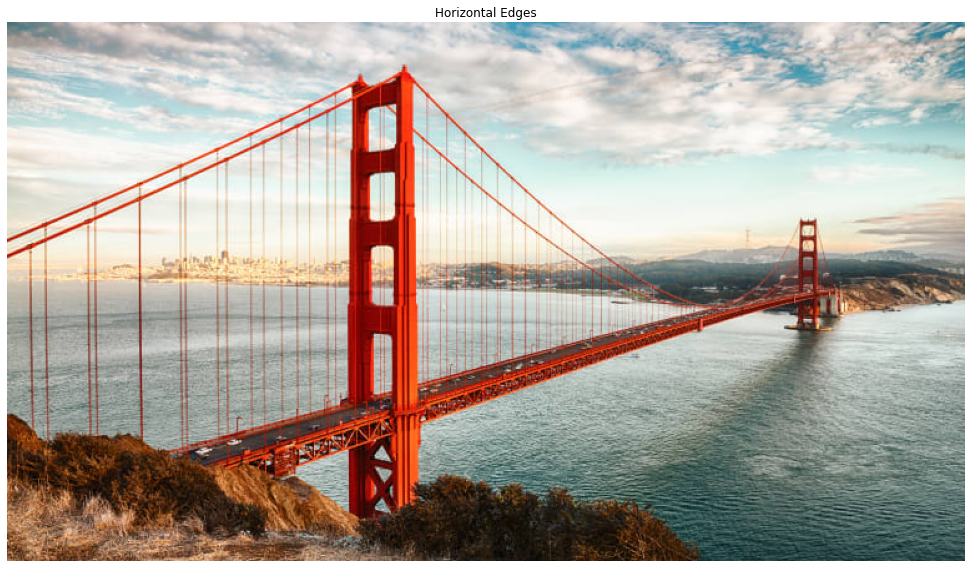

Expected Output


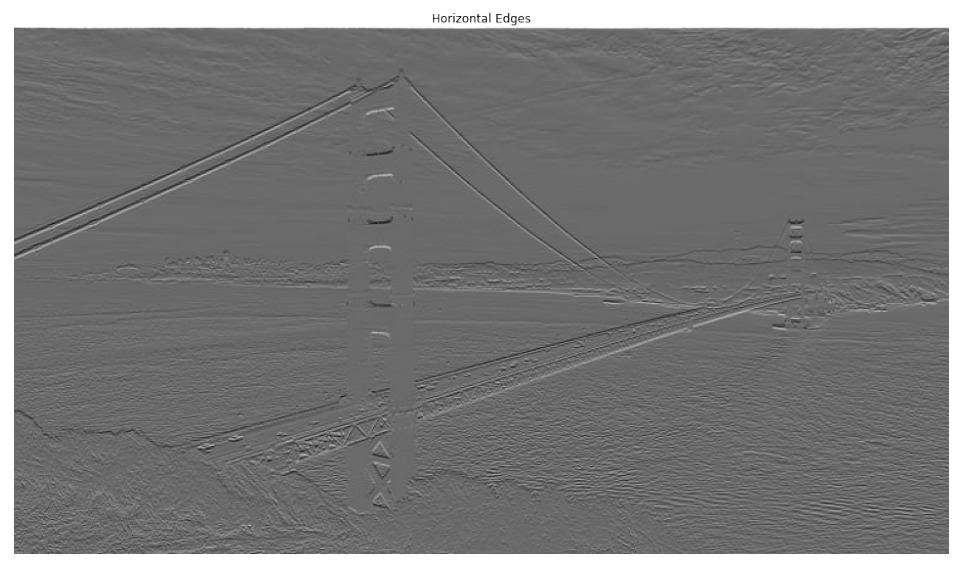

In [ ]:
def horizontal_edges(im):
    im_gray = grayscale(im)
    return im_gray

# Test the function
I = read_image_from_file('bridge.jpg')
plot_image(horizontal_edges(I), 'Horizontal Edges', size=(20, 8));

# Provide the expected output for this function
print('Expected Output')
plot_image(read_image_from_file('horizontal_edges_output.png'), '', size=(20, 8));

## Extra Credit Problem 2 - Vertical Edges
Display the vertical edges of a grayscale image. You can find vertical edges by subtracting adjacent columns in the image array. You need to solve this problem without using for loops.

Hint: Use the np.roll() function to shift the rows/cols of an image by 1 and then subtract from the original image.

In [14]:
def vertical_edges(im):
    im_gray = grayscale(im)
    return im_gray

# Test the function
I = read_image_from_file('bridge.jpg')
plot_image(vertical_edges(I), 'Vertical Edges', size=(20, 8));

# Provide the expected output for this function
print('Expected Output')
plot_image(read_image_from_file('vertical_edges_output.png'), '', size=(20, 8));

NameError: name 'Path' is not defined